In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from collections import Counter


In [2]:
# Get the list of stopwords

nltk.download('stopwords')
stopwords_list = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Konstantinos
[nltk_data]     Razgkel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset = pd.read_csv("data/training_data.tsv.gz", sep="\t", header=None)
dataset.dropna(inplace=True)

In [ ]:
df = dataset.head(10000)

df.rename(columns={0: 'index', 1: 'title', 2: 'text', 3: 'labels'}, inplace=True)
df.drop('index', axis=1, inplace=True)

X = df.drop('labels', axis=1)
X = X.applymap(lambda x: re.sub(r'<.*?>|[^\w\s]', '', x.lower())).applymap(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))


unique_labels = df['labels'].unique()
n_clusters = len(unique_labels)

#label_dict = {i: label for i, label in enumerate(unique_labels)}

y = df['labels']
X  = X["title"] + X["text"]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(X)

pca = TruncatedSVD(n_components=3)
X = pca.fit_transform(X)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the KNN classifier
kmeans = KMeans(n_clusters=n_clusters)

# Train the KNN classifier
kmeans.fit(X_train, y_train)

# Make predictions on the test set
y_pred = kmeans.predict(X_test)


# Create a dictionary to store the assigned cluster for each label
label_cluster_dict = {}

# Iterate over each label and its corresponding predicted cluster label
for label, cluster in zip(y, y_pred):
    # Check if the label is already in the dictionary
    if label not in label_cluster_dict:
        # If the label doesn't exist, assign the cluster to the label
        label_cluster_dict[label] = cluster

# Print the assigned cluster for each label
label_dict = {label: cluster for label, cluster in label_cluster_dict.items()}

silhouette_coefficient = silhouette_score(X_test, y_pred)
print("Silhouette Coefficient:", silhouette_coefficient)

centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Centroids')
plt.legend(['Data Points', 'Centroids'])

# Show the plot
plt.show()

In [ ]:
from collections import defaultdict

# Get the predicted labels for the training set
y_pred_train = kmeans.labels_

# Create a dictionary to store centroid labels
centroid_labels = defaultdict(list)

# Assign labels per centroid
for i, label in enumerate(y_pred_train):
    centroid_labels[label].append(y_train.iloc[i].idxmax())

# Print the centroid labels
for centroid, labels in centroid_labels.items():
    print(f"Centroid {centroid} labels: {labels}")

In [ ]:
predict = pd.DataFrame(y_pred)
predict.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

results = pd.concat([y_test, predict], axis=1)
results.rename(columns={"labels": "Actual Label", 0: 'Predicted Label'}, inplace=True)
results
#correct_predictions = results[results['Predicted Label'] == results['Actual Label']]

# pd.concat([y_test, predict], axis=1)

In [ ]:
# Get the predicted labels for the training set
y_pred_train = kmeans.labels_

# Create a dictionary to store cluster labels
cluster_labels = {}

# Assign labels to clusters
for i, label in enumerate(y_pred_train):
    if label not in cluster_labels:
        cluster_labels[label] = []
    cluster_labels[label].append(y_train.iloc[i].idxmax())

# Get the majority label for each cluster
majority_labels = {}
for cluster, labels in cluster_labels.items():
    counter = Counter(labels)
    majority_labels[cluster] = counter.most_common(1)[0][0]

# Print the cluster labels
for cluster, label in majority_labels.items():
    print(f"Cluster {cluster} label: {label}")

In [ ]:
# Create a dictionary to store the assigned cluster for each label
label_cluster_dict = {}

# Iterate over each label and its corresponding predicted cluster label
for label, cluster in zip(y, y_pred):
    # Check if the label is already in the dictionary
    if label not in label_cluster_dict:
        # If the label doesn't exist, assign the cluster to the label
        label_cluster_dict[label] = cluster

# Print the assigned cluster for each label
for label, cluster in label_cluster_dict.items():
    print(f"Label: {label}, Cluster: {cluster}")

In [ ]:
X

In [3]:
from sklearn.preprocessing import StandardScaler


dataset = pd.read_csv("data/training_data.tsv.gz", sep="\t", header=None)
dataset.dropna(inplace=True)

C:\Users\Konstantinos Razgkel\AppData\Local\Temp\ipykernel_2332\2074807832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={0: 'index', 1: 'title', 2: 'text', 3: 'labels'}, inplace=True)
C:\Users\Konstantinos Razgkel\AppData\Local\Temp\ipykernel_2332\2074807832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)
C:\Users\Konstantinos Razgkel\PycharmProjects\DataMine\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Silhouette Coefficient: 0.309014109205944


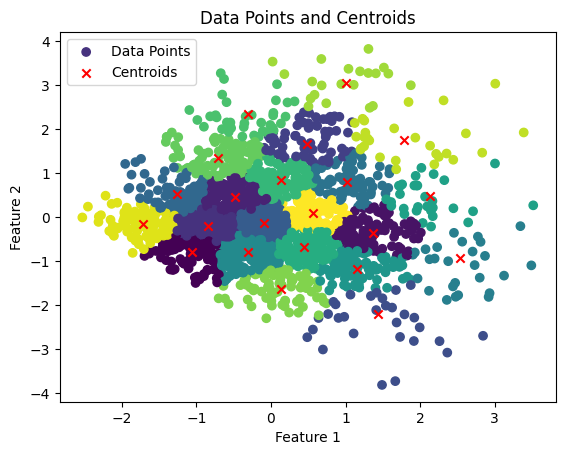

In [38]:
#scaler = StandardScaler()


,0,1
count,10000.000000,10000.000000
mean,0.135464,0.000787
std,0.048358,0.073231
min,0.006025,-0.290711
25%,0.101263,-0.046319
50%,0.132437,-0.008452
75%,0.165930,0.041615
max,0.339052,0.329693


In [18]:
print(dataset)

,0,1
count,1.000000e+04,1.000000e+04
mean,2.811973e-15,-5.684342e-17
std,1.000050e+00,1.000050e+00
min,-2.676801e+00,-3.959387e+00
25%,-7.072725e-01,-6.415863e-01
50%,-6.259053e-02,-1.247735e-01
75%,6.300385e-01,5.587770e-01
max,4.210225e+00,4.459507e+00


C:\Users\Konstantinos Razgkel\PycharmProjects\DataMine\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Konstantinos Razgkel\PycharmProjects\DataMine\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Konstantinos Razgkel\PycharmProjects\DataMine\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Konstantinos Razgkel\PycharmProjects\DataMine\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

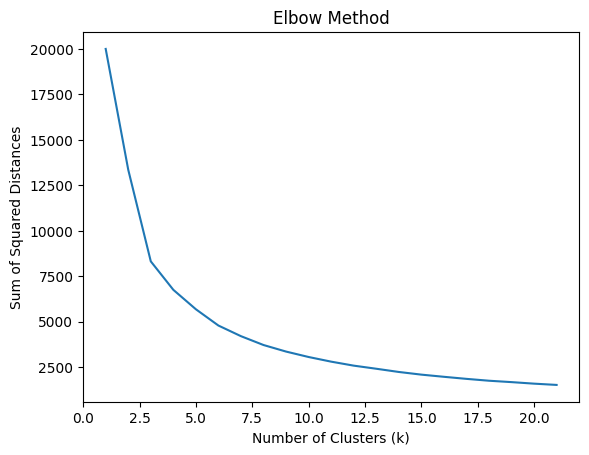

In [23]:
# Initialize empty list to store the sum of squared distances
sse = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the sum of squared distances
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

8000           jquery,css
8001               jquery
8002           javascript
8003    javascript,jquery
8004    javascript,jquery
              ...        
9995                 html
9996           javascript
9997           javascript
9998      jquery,html,css
9999    javascript,jquery
Name: labels, Length: 2000, dtype: object